<a href="https://colab.research.google.com/github/xh313/TidyTuesdayWithPython/blob/main/TidyTuesday22032022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Run from here after first time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib.pylab as pl
import math
from collections import Counter
import csv
import matplotlib as mpl
import seaborn as sns

In [26]:
mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/AmericanTypewriter.ttc')
plt.rcParams['font.serif'] = 'American Typewriter'
plt.rcParams['font.family'] = 'serif'

In [4]:
# Read data
all = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-22/babynames.csv')
df = all


In [5]:
# Select data

select = df[(df['year'] == 1990) & (df['n'] > 18000) & (df['sex'] == 'F')]

selected_name = list(select.name)

df = df[(df['year'] > 1960) & df.name.isin(selected_name)]

In [6]:
df  # Inspect

,year,sex,name,n,prop
584401,1961,F,Elizabeth,18852,0.009079
584429,1961,F,Jennifer,9262,0.004461
584460,1961,F,Stephanie,5810,0.002798
584495,1961,F,Sarah,4207,0.002026
584630,1961,F,Lauren,1259,0.000606
...,...,...,...,...,...
1913921,2017,M,Ashley,32,0.000016
1918797,2017,M,Elizabeth,9,0.000005
1923277,2017,M,Emily,5,0.000003
1923854,2017,M,Lauren,5,0.000003


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


[Text(1950.0, 0, ''),
 Text(1960.0, 0, ''),
 Text(1970.0, 0, '1970'),
 Text(1980.0, 0, '1980'),
 Text(1990.0, 0, '1990'),
 Text(2000.0, 0, '2000'),
 Text(2010.0, 0, '2010'),
 Text(2020.0, 0, '2020')]

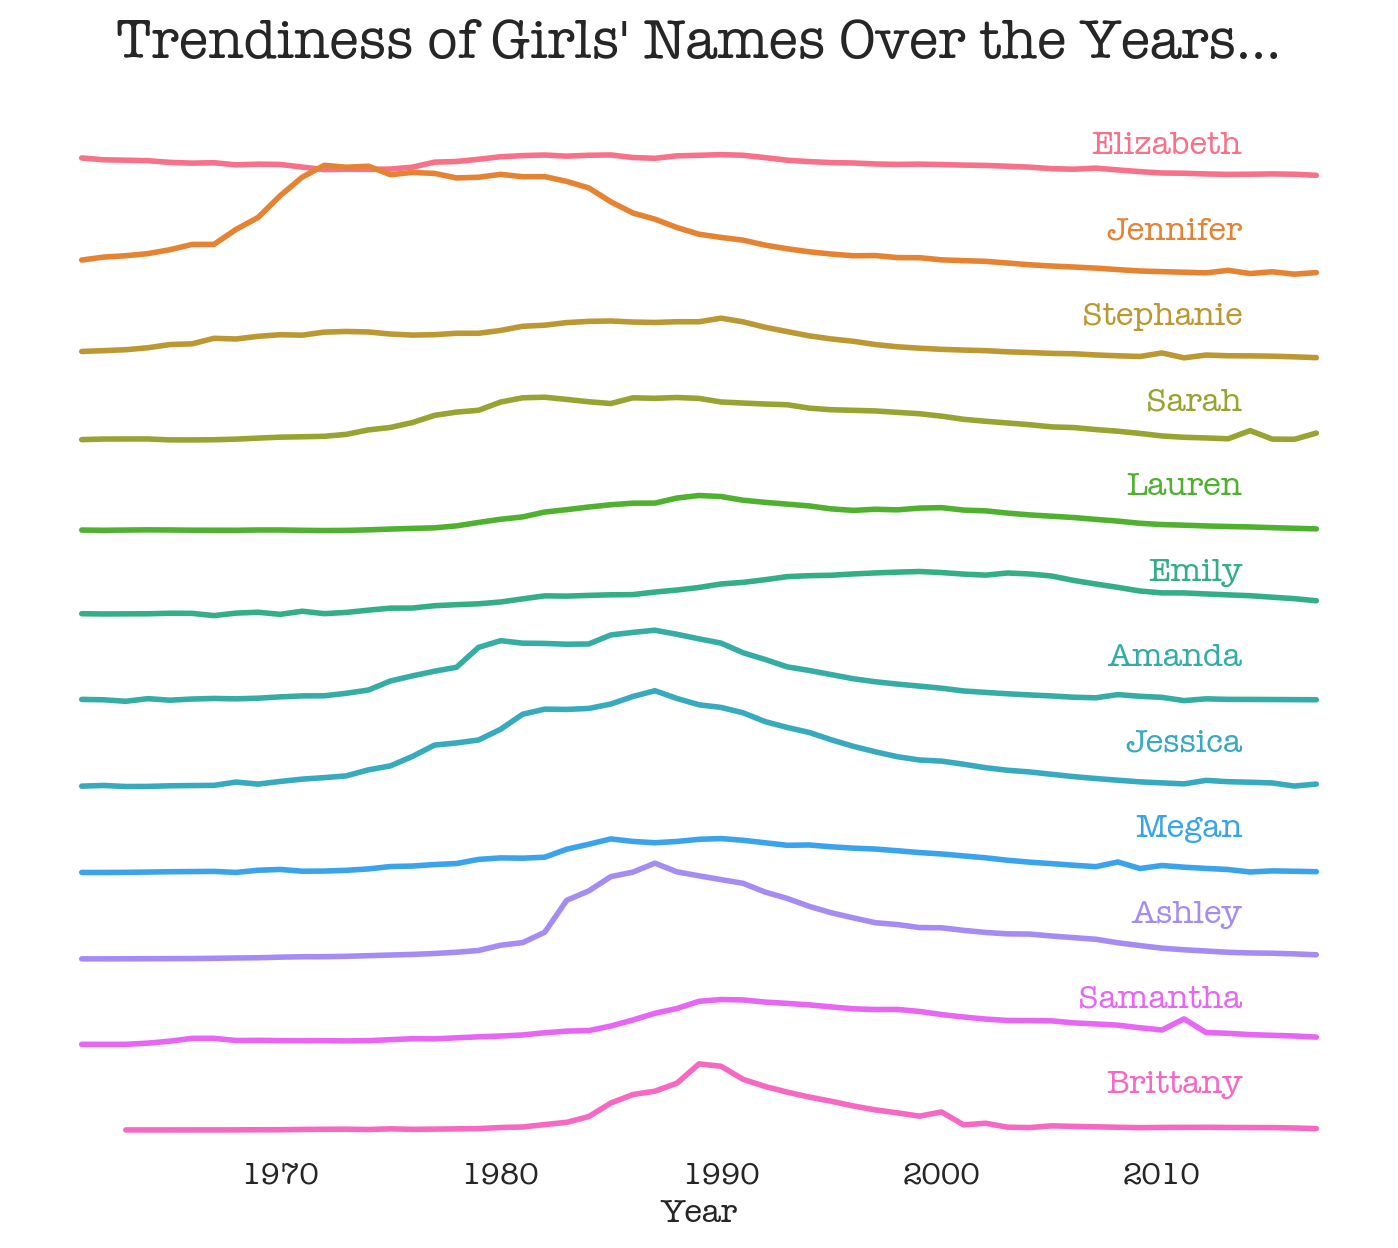

In [57]:
# Improved Visuals

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

#pal = sns.cubehelix_palette(12, start=0, rot=1.65, dark=.45, light=.6,)
pal = sns.color_palette("husl", 12)
g = sns.relplot(
    data=df,
    x="year", y="n", row="name", hue="name",
    kind="line", palette=pal, linewidth=2,
    height=.5, aspect=15, legend=False, ci=None
)

# Iterate over each subplot to customize further
c = 0
for name, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(0.9, 0.35, name, color=(pal[c][0],pal[c][1],pal[c][2]), 
            ha='right', transform=ax.transAxes, zorder=10, 
            fontfamily='American Typewriter')
    c += 1

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.3)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.set_axis_labels(x_var='Year', y_var='', fontfamily='American Typewriter')
g.despine(bottom=True, left=True)

# Add a title
plots = list(g.axes_dict.items())
to_add = plots[0][1]
to_add.set_title('Trendiness of Girls\' Names Over the Years...', 
                 fontfamily='American Typewriter', fontsize=20)

# Add a tick
tick_add = plots[len(plots)-1][1]
tick_add.set_xticklabels(labels=['', '', 1970, 1980, 1990, 2000, 2010, 2020], 
                         fontdict={'family': 'American Typewriter'})

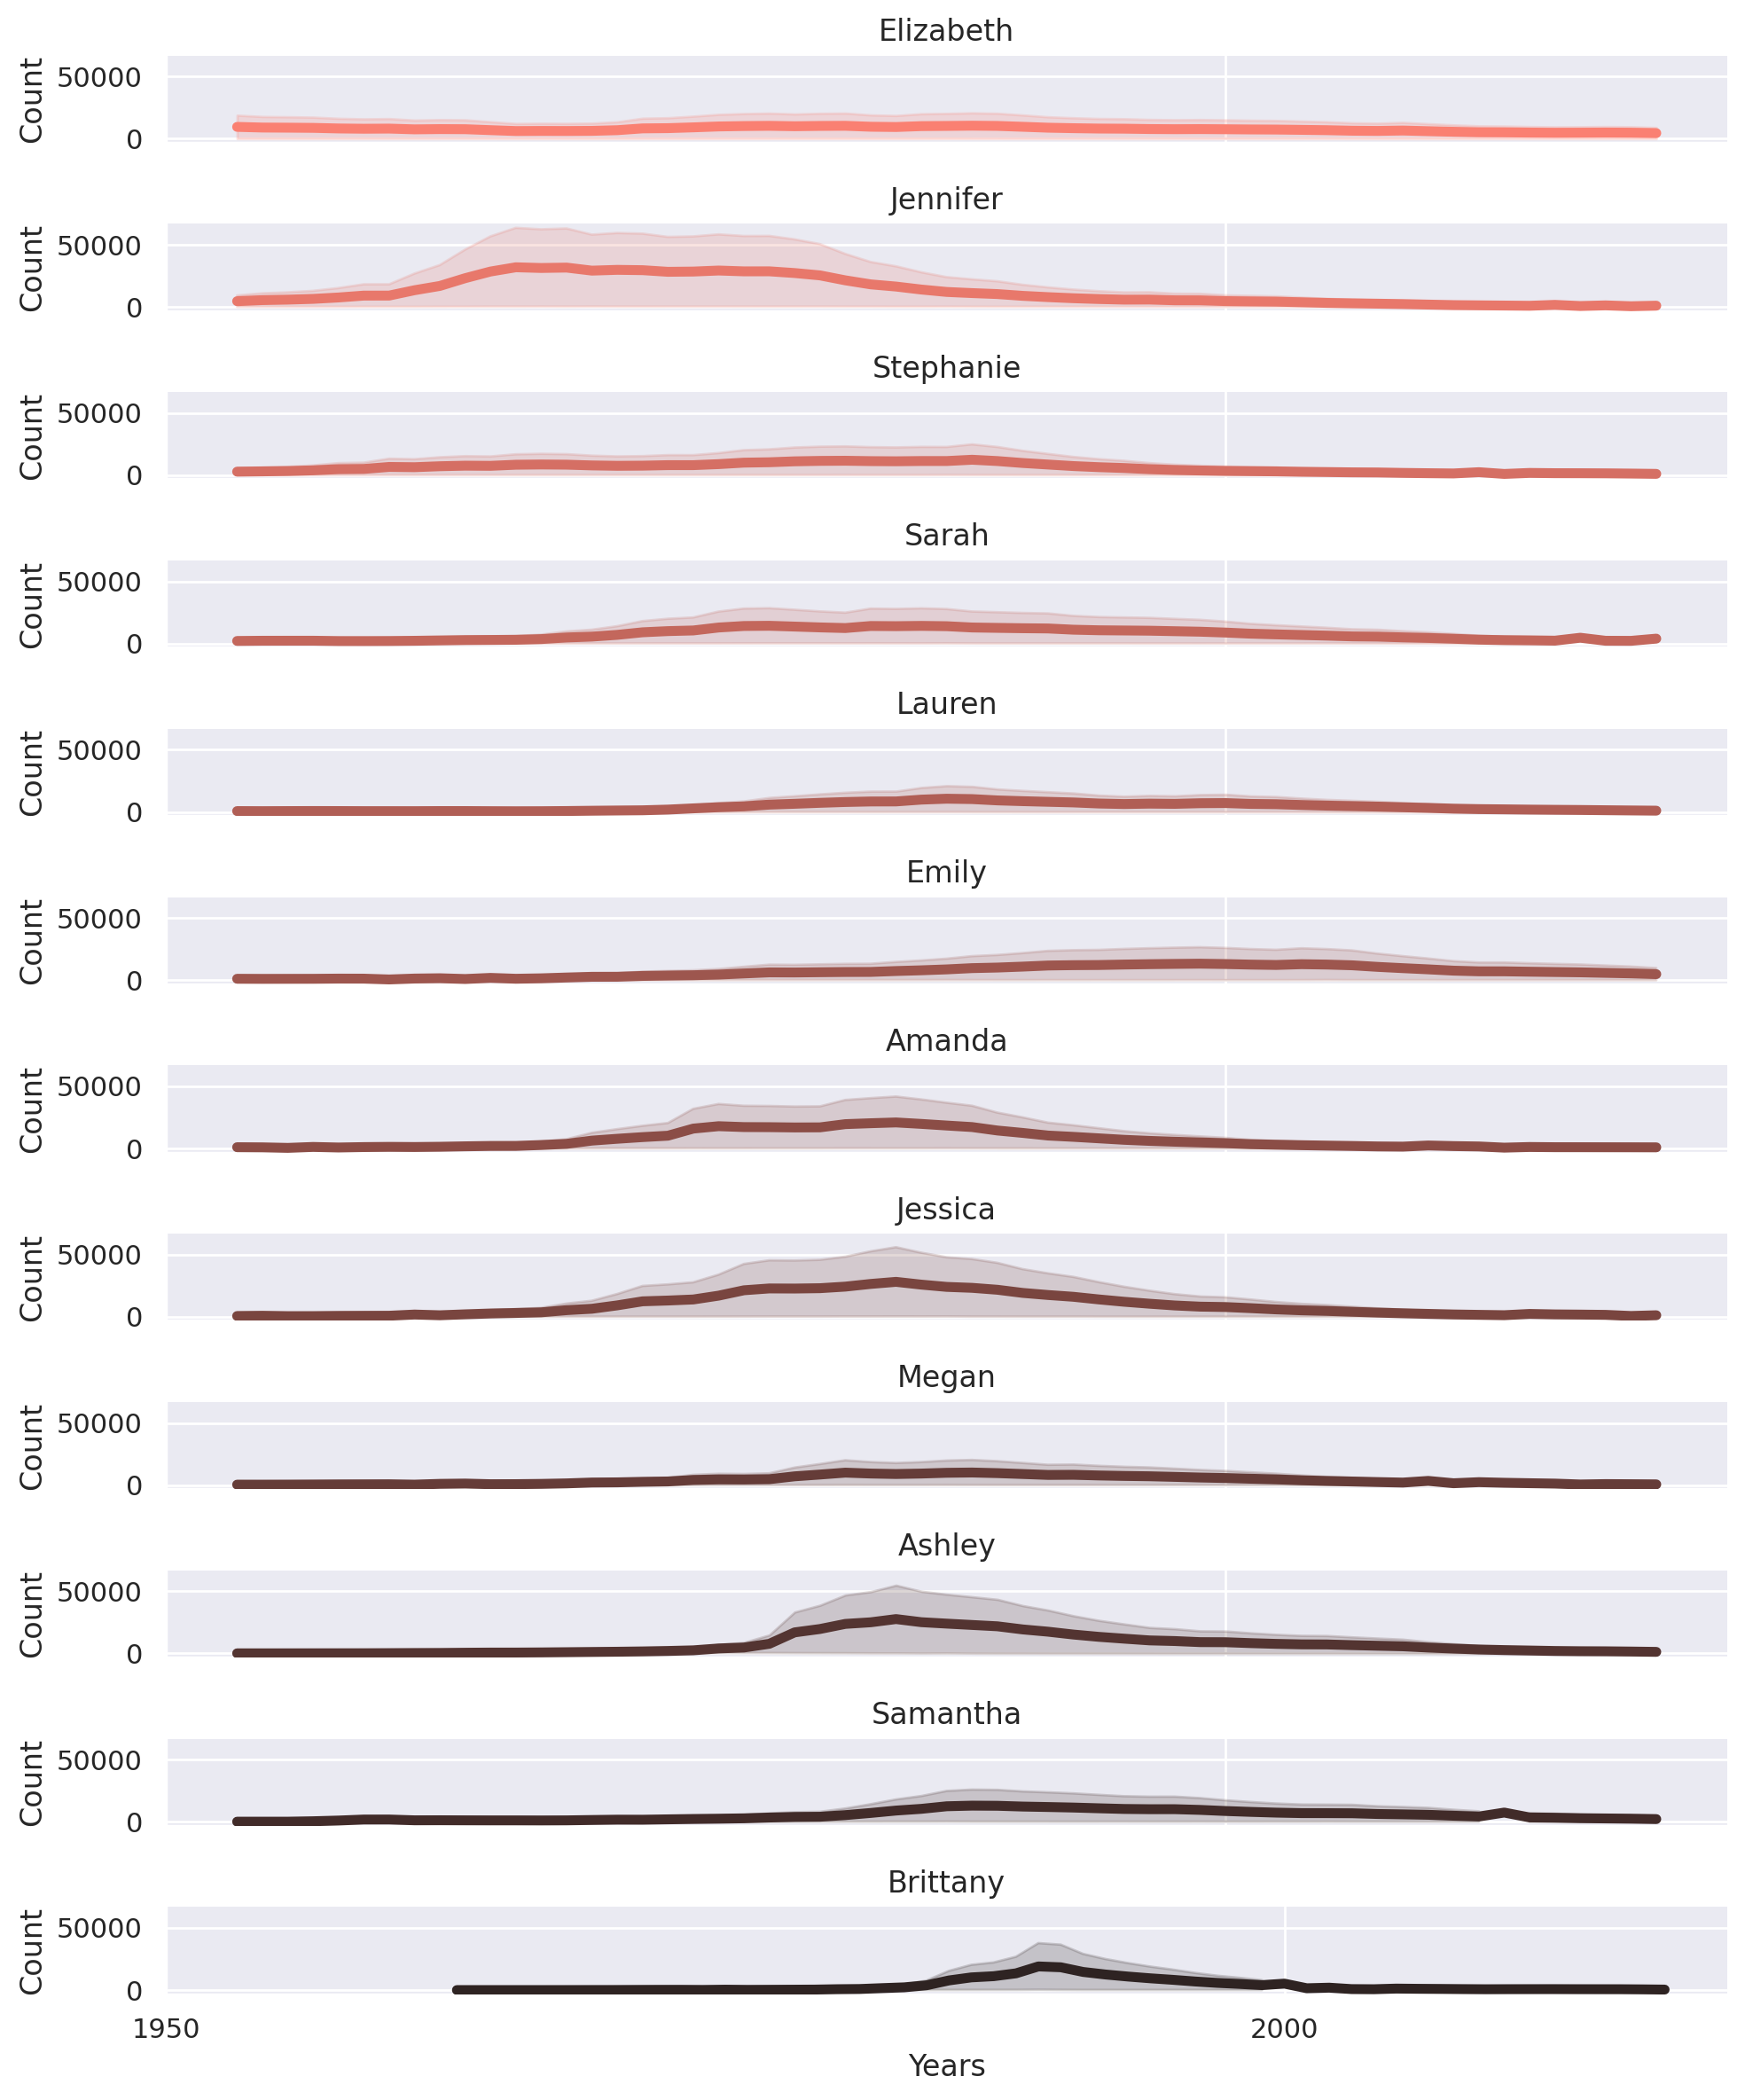

In [56]:
# First draft plot

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set(rc={"figure.dpi":200, 'savefig.dpi':300})

g = sns.relplot(
    data=df,
    x="year", y="n", row="name", hue="name",
    kind="line", palette="dark:salmon_r", linewidth=4, zorder=5,
    height=1, aspect=10, legend=False,
)

# Iterate over each subplot to customize further
for name, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.set_title(name)

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::5])

# Tweak the supporting aspects of the plot

g.set_axis_labels("Years", "Count")
g.tight_layout()